# Infomap
Multi-level network clustering based on the [Map equation](http://www.mapequation.org/publications.html#Rosvall-Axelsson-Bergstrom-2009-Map-equation).


### The Map Equation

\begin{equation*}
    L(M) = q_\curvearrowright H(\mathcal{Q}) + \sum_{i = 1}^{m}{p_{\circlearrowright}^i H(\mathcal{P}^i)}
\end{equation*}

$L(M)$ measures the amount of information it takes to describe a random walk on a network given a partition of the network into modules $M$. It is a sum of the amount of information needed to describe the movements _between_ and _within_ the modules, which balances the goodness of fit with the complexity of the model. For more information, see [www.mapequation.org](http://www.mapequation.org).

### Import Infomap
Infomap includes an `examples/python` folder with some examples, including this notebook. Run `make` in that directory to build the python interface to a local folder.

The `infomap` package exposes two classes, `Infomap` and `MemInfomap`, that wraps an input `network`, an output `tree`, and a `run` method to run Infomap on the input network. The classes takes a string of [options](http://www.mapequation.org/code.html#Options) as input.

In [12]:
import infomap
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from glob import glob
from tqdm import tqdm
%matplotlib inline

In [94]:
def findCommunities(G):
    """
    Partition network with the Infomap algorithm.
    Annotates nodes with 'community' id and return number of communities found.
    """

    #infomapWrapper = infomap.Infomap("--two-level --silent")  # even testen zonder two-level
    infomapWrapper = infomap.Infomap(" --silent")
    
    network = infomapWrapper.network()

    print("Building Infomap network from a NetworkX graph...")
    for e in G.edges(data=True):
        network.addLink(e[0],e[1],e[2]['weight'])

    print("Find communities with Infomap...")
    infomapWrapper.run();

    #tree = network.tree

    # print("Found %d modules with codelength: %f" % (tree.numTopModules(), tree.codelength()))

    print("Found {} modules with codelength: {}".format(infomapWrapper.numTopModules(), infomapWrapper.codelength()))

    print("Result")
    print("\n#node module")
 
    communities = {}
    for node in infomapWrapper.iterTree():
        if node.isLeaf():
            print("{} {}".format(node.physicalId, node.moduleIndex()))
    
        communities[node.physicalId] = node.moduleIndex()

    nx.set_node_attributes(G, name='community', values=communities)
    return G

In [93]:
def drawNetwork(G):
    # position map
    pos = nx.spring_layout(G)
    # community ids
    communities = [v for k,v in nx.get_node_attributes(G, 'community').items()]
    numCommunities = max(communities) + 1
    # color map from http://colorbrewer2.org/
    cmapLight = colors.ListedColormap(['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6'], 'indexed', numCommunities)
    cmapDark = colors.ListedColormap(['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a'], 'indexed', numCommunities)

    # Draw edges
    nx.draw_networkx_edges(G, pos)

    # Draw nodes
    nodeCollection = nx.draw_networkx_nodes(G,
        pos = pos,
        node_color = communities,
        cmap = cmapLight
    )
    # Set node border color to the darker shade
    darkColors = [cmapDark(v) for v in communities]
    nodeCollection.set_edgecolor(darkColors)

    # Draw node labels
    for n in G.nodes():
        plt.annotate(n,
            xy = pos[n],
            textcoords = 'offset points',
            horizontalalignment = 'center',
            verticalalignment = 'center',
            xytext = [0, 0],
            color = cmapDark(communities[n])
        )

    plt.axis('off')
    # plt.savefig("karate.png")
    plt.show()

In [7]:
files = glob('../../data/intermediate/*.net')
print('There are {} files'.format(len(files)))

There are 556 files


In [ ]:
with open(files[0]) as f:
    test = f.read()

In [ ]:
G = nx.read_pajek(files[0])

Gint = nx.convert_node_labels_to_integers(G)

In [91]:
# we hebben kennelijk ook self loops opgeslagen (similarity van elk artikel met zichzelf = 1), weg ermee

In [82]:
len(G.edges)

126149

In [88]:
G.remove_edges_from(list(G.selfloop_edges()))

In [89]:
len(G.edges)

125947

In [122]:
list(G.selfloop_edges())

[]

In [123]:
insignificant_edges = ([(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] < 0.6])
G.remove_edges_from(insignificant_edges)

In [124]:
len(G.edges)

49

Building Infomap network from a NetworkX graph...
Find communities with Infomap...
Found 1 modules with codelength: 9.11061251399509
Result

#node module
0 0
70 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
23 0
24 0
25 0
26 0
28 0
29 0
30 0
31 0
32 0
34 0
35 0
36 0
37 0
38 0
40 0
41 0
42 0
43 0
44 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
60 0
61 0
62 0
63 0
64 0
66 0
67 0
68 0
69 0
71 0
72 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
106 0
107 0
108 0
109 0
110 0
112 0
113 0
114 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
157 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
167 0
168 0
169 0
170 0
172 0
174 0
175 0
176 0
177 0
178 0
179 0
180 0
1

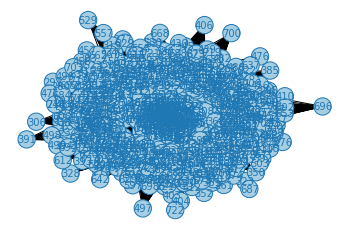

In [125]:
H = findCommunities(Gint)

drawNetwork(H)

In [96]:
print([(u,v,d) for (u,v,d) in G.edges(data=True) if d['weight'] >= 0.99])

[('https://www.ad.nl/politiek/kamermeerderheid-kinderpardon-stop-dus-nu-al-met-uitzettingen~a1c97228/', 'https://www.ad.nl/politiek/advocaten-stop-nu-met-uitzetting-kinderen~a1c97228/', {'weight': 1.0}), ('https://www.ad.nl/sport/john-mcenroe-wordt-gediskwalificeerd-op-australian-open~aae36de9/', 'https://www.ad.nl/sport/grote-bek-komt-john-mcenroe-duur-te-staan-in-melbourne~aae36de9/', {'weight': 1.0}), ('https://www.nu.nl/-/5695778/', 'https://www.nu.nl/-/5695790/', {'weight': 1.0}), ('https://www.nu.nl/-/5695883/', 'https://www.nu.nl/-/5695877/', {'weight': 1.0})]


In [ ]:
for e in G.edges(data=True):
    print(*e)

In [ ]:
nx.read_pajek?

In [ ]:
G_recoveredlabels = nx.relabel_nodes(Gint, dict(zip(Gint,G)))

In [ ]:
nx.draw(G, with_labels=True)

In [ ]:
H_labeled = nx.relabel_nodes(H, dict(zip(H,G)))

In [ ]:
nx.draw(H_labeled, with_labels=True)

In [ ]:

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.5]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.5]

pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=700)

# edges
nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=6)
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=6,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.show()

In [ ]:
G.edges(data=True)

## Leiden Algorithm testen
https://github.com/vtraag/leidenalg

In [2]:
import leidenalg
import igraph as ig

In [36]:
Gig = ig.read(files[0], format='pajek')

In [37]:
len(Gig.get_edgelist())

126149

In [38]:
Gig.es.select(weight_le=0.5).delete()

In [39]:
len(Gig.get_edgelist())

327

In [13]:
part = leidenalg.find_partition(Gig, leidenalg.ModularityVertexPartition);

In [14]:
part.summary()

'Clustering with 725 elements and 649 clusters'

In [ ]:
ig.plot(part)

In [15]:
part.membership

[14,
 0,
 31,
 32,
 33,
 34,
 35,
 36,
 0,
 37,
 38,
 39,
 7,
 3,
 40,
 41,
 30,
 42,
 43,
 6,
 6,
 21,
 8,
 5,
 44,
 19,
 45,
 0,
 9,
 46,
 0,
 47,
 12,
 10,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 15,
 16,
 57,
 27,
 26,
 13,
 58,
 59,
 60,
 61,
 18,
 62,
 63,
 5,
 2,
 64,
 10,
 65,
 17,
 18,
 66,
 67,
 68,
 11,
 69,
 70,
 71,
 14,
 72,
 10,
 20,
 8,
 73,
 74,
 75,
 76,
 77,
 4,
 19,
 0,
 78,
 0,
 79,
 80,
 1,
 11,
 1,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 0,
 92,
 1,
 93,
 94,
 95,
 96,
 97,
 98,
 22,
 99,
 100,
 101,
 24,
 102,
 103,
 104,
 20,
 105,
 106,
 0,
 107,
 108,
 109,
 3,
 110,
 111,
 2,
 29,
 112,
 113,
 114,
 2,
 115,
 16,
 116,
 17,
 117,
 12,
 6,
 1,
 118,
 21,
 22,
 119,
 120,
 121,
 122,
 25,
 123,
 23,
 124,
 125,
 0,
 126,
 8,
 9,
 127,
 128,
 23,
 129,
 130,
 131,
 1,
 24,
 28,
 6,
 132,
 133,
 134,
 135,
 25,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 12,
 26,
 148,
 27,
 13,
 3,
 149,
 1,
 15,
 1,
 0,
 150,


In [16]:
sg1 = part.subgraphs()[5]

In [61]:
for node in sg1.vs:
    print(node['id'])

https://www.ad.nl/nieuws/en-toen-werd-het-tijd-voor-een-altaar-in-huis~a11fe429/
https://www.ad.nl/tech/kids-die-niet-terugbellen-deze-app-vergrendelt-telefoon-tot-antwoord~a7d90faa/
https://www.nu.nl/-/5695928/
https://www.nu.nl/-/5698325/
https://www.ad.nl/gouda/wij-rijden-hier-gewoon-met-honderd-over-de-besneeuwde-wegen~ae2b63b5/
https://www.ad.nl/koken-en-eten/lidl-belooft-duurzamer-eitje~abe828c3/
https://www.nu.nl/-/5701283/
https://www.nu.nl/-/5700917/
https://www.nu.nl/-/5701328/
https://www.nu.nl/-/5701130/
https://www.nu.nl/-/5699906/


In [40]:
sg2 = part.subgraphs()[0]

In [41]:
for node in sg2.vs:
    print(node['id'])

https://www.ad.nl/buitenland/britse-premier-may-overweegt-wijziging-goedevrijdagakkoord~ac480b382/
https://www.nu.nl/-/5696174/
https://www.nu.nl/-/5696369/
930517b
42489cb
https://www.ad.nl/economie/particuliere-huurwoning-vaak-slecht-geisoleerd-bevries-de-huurprijs~aaee4e92/
https://www.nu.nl/-/5700362/
https://www.ad.nl/nederlands-voetbal/advocaat-haalt-kramer-transfervrij-naar-fc-utrecht~a92127f7/
https://www.ad.nl/binnenland/hoe-weet-je-als-arts-of-een-patient-wel-of-niet-gereanimeerd-wil-worden~add2a119/
https://www.nu.nl/-/5699642/
https://www.nu.nl/-/5699645/


In [62]:
for node in part.giant().vs:
    print(node['id'])

https://www.ad.nl/buitenland/britse-premier-may-overweegt-wijziging-goedevrijdagakkoord~ac480b382/
https://www.nu.nl/-/5696174/
https://www.nu.nl/-/5696369/
930517b
42489cb
https://www.ad.nl/economie/particuliere-huurwoning-vaak-slecht-geisoleerd-bevries-de-huurprijs~aaee4e92/
https://www.nu.nl/-/5700362/
https://www.ad.nl/nederlands-voetbal/advocaat-haalt-kramer-transfervrij-naar-fc-utrecht~a92127f7/
https://www.ad.nl/binnenland/hoe-weet-je-als-arts-of-een-patient-wel-of-niet-gereanimeerd-wil-worden~add2a119/
https://www.nu.nl/-/5699642/
https://www.nu.nl/-/5699645/


In [17]:
for i, subgraph in enumerate(part.subgraphs()):
    print('\n\n\n',i,'\n')
    for node in subgraph.vs:
        print(node['id'])




 0 

https://www.ad.nl/politiek/kamermeerderheid-kinderpardon-stop-dus-nu-al-met-uitzettingen~a1c97228/
https://www.ad.nl/politiek/ook-d66-wil-uitzetstop-asielkinderen-spanningen-coalitie-lopen-verder-op~a6a72b0b/
1ed5aa2
5b3fb00
https://www.ad.nl/politiek/advocaten-stop-nu-met-uitzetting-kinderen~a1c97228/
https://www.ad.nl/binnenland/cu-voert-druk-op-kinderpardon-op-nu-geen-kinderen-het-land-uitzetten~aeeb38fe/
https://www.nu.nl/-/5695424/
https://www.ad.nl/politiek/vvd-volhardt-geen-uitzetstop-voor-asielkinderen~a01ba3bd/
https://www.nu.nl/-/5696303/
https://www.nu.nl/-/5696012/
f6414f3
e4d70c3
b0ccfbb
https://www.nu.nl/-/5698328/
https://www.ad.nl/politiek/harbers-geen-uitzetstop-asielkinderen-tot-onderzoek-klaar-is~ab215cd7/
a2d4fc4



 1 

https://www.ad.nl/binnenland/het-gaat-morgen-sneeuwen-met-hinder-voor-het-verkeer-als-gevolg~a027d8f2/
https://www.ad.nl/binnenland/morgen-code-geel-problemen-verwacht-door-sneeuw~a5d5871a/
https://www.nu.nl/-/5695481/
https://www.ad.nl/binn

**HAHAHHAA HET WERKT!!!! (als je van tevoren insignificant edges verwijdert)**

In [74]:
def partition_graph(G, minedgeweight=.5):
    '''takes an igraph, prunes it and particions it. returns a list of partitions '''
    G.es.select(weight_le=minedgeweight).delete()
    part = leidenalg.find_partition(G, leidenalg.ModularityVertexPartition)
    print(part.summary())
    partitions = []
    for subgraph in part.subgraphs():
         partitions.append([node['id'] for node in subgraph.vs])
    return partitions

In [75]:
G = ig.Graph()
results = []
for f in tqdm(files):
    Gi = ig.read(f, format='pajek')
    try:
        results.extend(partition_graph(Gi))
    except:
        print('Error while trying to process edge weights in file {}'.format(f))

  0%|          | 1/556 [00:00<02:14,  4.13it/s]

Clustering with 725 elements and 649 clusters
Clustering with 857 elements and 748 clusters


  1%|          | 5/556 [00:01<02:47,  3.30it/s]

Clustering with 265 elements and 207 clusters
Clustering with 736 elements and 613 clusters
Clustering with 958 elements and 787 clusters


  1%|          | 6/556 [00:01<03:18,  2.77it/s]

Clustering with 1079 elements and 894 clusters
Clustering with 1089 elements and 934 clusters


  1%|▏         | 8/556 [00:02<03:46,  2.41it/s]

Clustering with 985 elements and 810 clusters


  2%|▏         | 9/556 [00:03<03:53,  2.34it/s]

Clustering with 1055 elements and 898 clusters


  2%|▏         | 12/556 [00:05<05:34,  1.63it/s]

Clustering with 1118 elements and 905 clusters
Clustering with 1840 elements and 1340 clusters
Clustering with 598 elements and 496 clusters


  3%|▎         | 16/556 [00:07<03:54,  2.31it/s]

Clustering with 970 elements and 842 clusters
Clustering with 1037 elements and 856 clusters
Clustering with 976 elements and 851 clusters
Clustering with 834 elements and 749 clusters


  3%|▎         | 17/556 [00:07<03:50,  2.34it/s]

Clustering with 926 elements and 784 clusters


  3%|▎         | 18/556 [00:08<04:00,  2.24it/s]

Clustering with 1023 elements and 885 clusters
Error while trying to process edge weights in file ../../data/intermediate/INCA_softcosine_['nu', 'ad (www)', 'volkskrant (www)']_['nu', 'ad (www)', 'volkskrant (www)']_2019_6_24_20_42_39_206.net
Clustering with 1076 elements and 928 clusters


  4%|▍         | 24/556 [00:09<03:13,  2.75it/s]

Clustering with 492 elements and 492 clusters
Clustering with 186 elements and 185 clusters
Clustering with 934 elements and 802 clusters
Clustering with 1017 elements and 862 clusters


  5%|▍         | 27/556 [00:11<04:46,  1.84it/s]

Clustering with 1905 elements and 1429 clusters
Clustering with 840 elements and 714 clusters
Clustering with 947 elements and 818 clusters


  6%|▌         | 31/556 [00:13<04:21,  2.01it/s]

Clustering with 791 elements and 623 clusters
Clustering with 636 elements and 578 clusters
Clustering with 1150 elements and 966 clusters
Clustering with 1105 elements and 917 clusters
Clustering with 13 elements and 13 clusters
Clustering with 964 elements and 826 clusters

  7%|▋         | 37/556 [00:15<03:18,  2.61it/s]


Clustering with 1036 elements and 895 clusters
Clustering with 1126 elements and 940 clusters
Clustering with 481 elements and 464 clusters
Clustering with 943 elements and 842 clusters


  7%|▋         | 41/556 [00:17<03:21,  2.56it/s]

Clustering with 1089 elements and 933 clusters
Clustering with 873 elements and 754 clusters
Clustering with 954 elements and 852 clusters
Clustering with 961 elements and 821 clusters


  8%|▊         | 43/556 [00:18<03:59,  2.14it/s]

Clustering with 1019 elements and 823 clusters
Clustering with 1017 elements and 863 clusters
Clustering with 528 elements and 519 clusters
Error while trying to process edge weights in file ../../data/intermediate/INCA_softcosine_['nu', 'ad (www)', 'volkskrant (www)']_['nu', 'ad (www)', 'volkskrant (www)']_2019_6_24_20_42_39_275.net


  9%|▊         | 48/556 [00:20<03:14,  2.61it/s]

Clustering with 1609 elements and 1144 clusters
Clustering with 749 elements and 675 clusters
Clustering with 948 elements and 783 clusters


  9%|▉         | 50/556 [00:20<03:14,  2.60it/s]

Clustering with 953 elements and 796 clusters
Clustering with 904 elements and 772 clusters


 10%|▉         | 54/556 [00:22<03:26,  2.43it/s]

Clustering with 13 elements and 13 clusters
Clustering with 1005 elements and 840 clusters
Clustering with 1070 elements and 861 clusters
Clustering with 844 elements and 758 clusters


 10%|█         | 56/556 [00:23<03:19,  2.51it/s]

Clustering with 991 elements and 863 clusters
Clustering with 964 elements and 866 clusters


 11%|█         | 60/556 [00:24<03:22,  2.45it/s]

Clustering with 348 elements and 345 clusters
Clustering with 978 elements and 834 clusters
Clustering with 986 elements and 809 clusters
Clustering with 1011 elements and 867 clusters


 11%|█         | 62/556 [00:25<02:45,  2.99it/s]

Clustering with 761 elements and 691 clusters
Clustering with 734 elements and 613 clusters
Clustering with 325 elements and 264 clusters
Clustering with 1170 elements and 960 clusters

 12%|█▏        | 69/556 [00:27<02:51,  2.85it/s]


Clustering with 993 elements and 820 clusters
Clustering with 1030 elements and 851 clusters
Clustering with 547 elements and 432 clusters
Clustering with 717 elements and 680 clusters
Clustering with 1034 elements and 890 clusters


 13%|█▎        | 71/556 [00:29<04:16,  1.89it/s]

Clustering with 1023 elements and 873 clusters
Clustering with 1161 elements and 1026 clusters
Clustering with 825 elements and 743 clusters


 13%|█▎        | 75/556 [00:31<04:27,  1.80it/s]

Clustering with 1005 elements and 834 clusters
Clustering with 1017 elements and 818 clusters
Clustering with 1128 elements and 974 clusters


 14%|█▍        | 78/556 [00:32<03:43,  2.14it/s]

Clustering with 977 elements and 764 clusters
Clustering with 543 elements and 520 clusters
Clustering with 929 elements and 815 clusters
Clustering with 1201 elements and 992 clusters


 15%|█▌        | 84/556 [00:35<03:57,  1.99it/s]

Clustering with 1055 elements and 900 clusters
Clustering with 1091 elements and 880 clusters
Clustering with 1159 elements and 986 clusters
Clustering with 968 elements and 819 clusters
Clustering with 924 elements and 716 clusters


 16%|█▌        | 88/556 [00:37<03:31,  2.21it/s]

Clustering with 1084 elements and 855 clusters
Clustering with 704 elements and 547 clusters
Clustering with 1050 elements and 857 clusters
Clustering with 904 elements and 771 clusters


 16%|█▋        | 91/556 [00:39<04:12,  1.84it/s]

Clustering with 947 elements and 817 clusters
Clustering with 1609 elements and 1173 clusters
Clustering with 514 elements and 382 clusters
Clustering with 1009 elements and 856 clusters


 17%|█▋        | 96/556 [00:41<03:42,  2.07it/s]

Clustering with 981 elements and 855 clusters
Clustering with 1174 elements and 986 clusters
Clustering with 820 elements and 719 clusters
Clustering with 962 elements and 812 clusters


 17%|█▋        | 97/556 [00:43<05:34,  1.37it/s]

Clustering with 1683 elements and 1255 clusters


 18%|█▊        | 98/556 [00:44<06:48,  1.12it/s]

Clustering with 1627 elements and 1191 clusters


 18%|█▊        | 99/556 [00:45<06:40,  1.14it/s]

Clustering with 1139 elements and 950 clusters


 18%|█▊        | 101/556 [00:46<05:11,  1.46it/s]

Clustering with 1178 elements and 1005 clusters
Clustering with 885 elements and 768 clusters


 18%|█▊        | 102/556 [00:46<04:56,  1.53it/s]

Clustering with 1141 elements and 962 clusters


 19%|█▊        | 103/556 [00:47<04:45,  1.59it/s]

Clustering with 1135 elements and 980 clusters


 19%|█▊        | 104/556 [00:47<04:28,  1.68it/s]

Clustering with 1030 elements and 853 clusters
Clustering with 1006 elements and 829 clusters


 19%|█▉        | 106/556 [00:48<03:42,  2.02it/s]

Clustering with 847 elements and 754 clusters


 19%|█▉        | 107/556 [00:49<03:36,  2.07it/s]

Clustering with 964 elements and 823 clusters


 20%|█▉        | 109/556 [00:49<02:45,  2.70it/s]

Clustering with 972 elements and 819 clusters
Clustering with 786 elements and 730 clusters


 20%|█▉        | 111/556 [00:50<02:13,  3.33it/s]

Clustering with 725 elements and 653 clusters
Clustering with 575 elements and 468 clusters


 20%|██        | 112/556 [00:51<03:13,  2.30it/s]

Clustering with 1050 elements and 861 clusters
Clustering with 1005 elements and 839 clusters

 21%|██        | 114/556 [00:52<04:31,  1.63it/s]


Clustering with 1247 elements and 1105 clusters
Clustering with 528 elements and 518 clusters


 21%|██        | 117/556 [00:54<05:56,  1.23it/s]

Clustering with 763 elements and 654 clusters
Clustering with 1703 elements and 1252 clusters


 21%|██▏       | 119/556 [00:55<04:51,  1.50it/s]

Clustering with 953 elements and 794 clusters
Clustering with 1089 elements and 944 clusters


 22%|██▏       | 120/556 [00:55<04:22,  1.66it/s]

Clustering with 916 elements and 744 clusters
Clustering with 492 elements and 492 clusters


 22%|██▏       | 123/556 [00:57<03:36,  2.00it/s]

Clustering with 1084 elements and 932 clusters
Clustering with 939 elements and 789 clusters


 22%|██▏       | 125/556 [00:57<02:56,  2.44it/s]

Clustering with 114 elements and 98 clusters
Clustering with 867 elements and 719 clusters


 23%|██▎       | 127/556 [00:58<03:31,  2.03it/s]

Clustering with 943 elements and 846 clusters
Clustering with 1159 elements and 1008 clusters


 23%|██▎       | 129/556 [00:58<02:26,  2.92it/s]

Clustering with 838 elements and 717 clusters
Clustering with 593 elements and 558 clusters


 23%|██▎       | 130/556 [01:01<06:26,  1.10it/s]

Clustering with 1831 elements and 1366 clusters


 24%|██▎       | 131/556 [01:01<05:32,  1.28it/s]

Clustering with 1021 elements and 916 clusters


 24%|██▎       | 132/556 [01:02<05:15,  1.35it/s]

Clustering with 1020 elements and 882 clusters


 24%|██▍       | 133/556 [01:02<05:00,  1.41it/s]

Clustering with 1148 elements and 1020 clusters


 24%|██▍       | 134/556 [01:03<05:09,  1.37it/s]

Clustering with 1082 elements and 877 clusters
Clustering with 607 elements and 599 clusters


 24%|██▍       | 136/556 [01:04<04:01,  1.74it/s]

Clustering with 697 elements and 544 clusters


 25%|██▍       | 137/556 [01:04<03:53,  1.80it/s]

Clustering with 962 elements and 862 clusters
Clustering with 265 elements and 209 clusters


 25%|██▌       | 139/556 [01:05<03:23,  2.05it/s]

Clustering with 1004 elements and 854 clusters


 25%|██▌       | 140/556 [01:05<03:15,  2.13it/s]

Clustering with 947 elements and 781 clusters


 26%|██▌       | 142/556 [01:06<03:16,  2.10it/s]

Clustering with 919 elements and 786 clusters
Clustering with 1001 elements and 788 clusters


 26%|██▌       | 144/556 [01:07<02:53,  2.38it/s]

Clustering with 562 elements and 450 clusters
Clustering with 913 elements and 680 clusters


 26%|██▋       | 146/556 [01:08<03:43,  1.83it/s]

Clustering with 1017 elements and 816 clusters
Clustering with 976 elements and 787 clusters


 27%|██▋       | 148/556 [01:09<02:48,  2.42it/s]

Clustering with 1037 elements and 902 clusters
Clustering with 426 elements and 383 clusters


 27%|██▋       | 151/556 [01:10<02:23,  2.81it/s]

Clustering with 1090 elements and 936 clusters
Clustering with 607 elements and 597 clusters
Clustering with 543 elements and 521 clusters


 28%|██▊       | 154/556 [01:10<01:44,  3.86it/s]

Clustering with 759 elements and 675 clusters
Clustering with 595 elements and 528 clusters
Clustering with 506 elements and 406 clusters


 28%|██▊       | 155/556 [01:11<02:09,  3.10it/s]

Clustering with 957 elements and 822 clusters


 28%|██▊       | 157/556 [01:12<02:55,  2.28it/s]

Clustering with 993 elements and 819 clusters
Clustering with 1196 elements and 1025 clusters


 28%|██▊       | 158/556 [01:12<03:07,  2.12it/s]

Clustering with 1020 elements and 880 clusters


 29%|██▊       | 159/556 [01:13<03:00,  2.20it/s]

Clustering with 964 elements and 822 clusters


 29%|██▉       | 160/556 [01:13<03:15,  2.02it/s]

Clustering with 1139 elements and 948 clusters


 29%|██▉       | 162/556 [01:15<03:36,  1.82it/s]

Clustering with 1176 elements and 915 clusters
Clustering with 961 elements and 777 clusters


 29%|██▉       | 163/556 [01:15<03:51,  1.70it/s]

Clustering with 1087 elements and 901 clusters


 30%|███       | 167/556 [01:17<03:15,  1.99it/s]

Clustering with 1006 elements and 820 clusters
Clustering with 1149 elements and 944 clusters
Clustering with 398 elements and 315 clusters
Clustering with 1086 elements and 902 clusters


 30%|███       | 169/556 [01:18<03:00,  2.15it/s]

Clustering with 917 elements and 770 clusters
Clustering with 917 elements and 772 clusters


 31%|███       | 170/556 [01:19<02:57,  2.18it/s]

Clustering with 983 elements and 833 clusters


 31%|███       | 171/556 [01:19<03:08,  2.05it/s]

Clustering with 1134 elements and 974 clusters


 31%|███       | 173/556 [01:20<02:55,  2.18it/s]

Clustering with 978 elements and 842 clusters
Clustering with 920 elements and 766 clusters
Clustering with 1150 elements and 978 clusters


 32%|███▏      | 176/556 [01:22<03:58,  1.60it/s]

Clustering with 874 elements and 728 clusters
Clustering with 1435 elements and 1079 clusters


 32%|███▏      | 178/556 [01:24<05:39,  1.11it/s]

Clustering with 1208 elements and 1006 clusters
Clustering with 1667 elements and 1256 clusters


 32%|███▏      | 179/556 [01:25<04:41,  1.34it/s]

Clustering with 962 elements and 839 clusters


 32%|███▏      | 180/556 [01:25<04:25,  1.42it/s]

Clustering with 1026 elements and 800 clusters
Clustering with 680 elements and 656 clusters


 33%|███▎      | 182/556 [01:26<04:14,  1.47it/s]

Clustering with 1452 elements and 1081 clusters


 33%|███▎      | 183/556 [01:28<05:09,  1.20it/s]

Clustering with 1598 elements and 1258 clusters


 33%|███▎      | 184/556 [01:28<04:34,  1.35it/s]

Clustering with 977 elements and 841 clusters


 33%|███▎      | 185/556 [01:29<03:51,  1.60it/s]

Clustering with 708 elements and 564 clusters
Clustering with 1085 elements and 883 clusters

 34%|███▎      | 187/556 [01:30<03:24,  1.80it/s]


Clustering with 947 elements and 817 clusters


 34%|███▍      | 188/556 [01:30<03:15,  1.88it/s]

Clustering with 968 elements and 840 clusters


 34%|███▍      | 189/556 [01:32<05:13,  1.17it/s]

Clustering with 1899 elements and 1395 clusters


 34%|███▍      | 191/556 [01:33<04:58,  1.22it/s]

Clustering with 1601 elements and 1250 clusters
Clustering with 1151 elements and 1005 clusters


 35%|███▍      | 193/556 [01:34<03:46,  1.60it/s]

Clustering with 184 elements and 183 clusters
Clustering with 697 elements and 540 clusters


 35%|███▌      | 195/556 [01:34<02:48,  2.15it/s]

Clustering with 899 elements and 757 clusters
Clustering with 838 elements and 721 clusters


 35%|███▌      | 196/556 [01:35<02:34,  2.32it/s]

Clustering with 845 elements and 735 clusters


 35%|███▌      | 197/556 [01:35<02:15,  2.65it/s]

Clustering with 810 elements and 723 clusters


 36%|███▌      | 199/556 [01:36<02:50,  2.10it/s]

Clustering with 985 elements and 810 clusters
Clustering with 1102 elements and 923 clusters


 36%|███▌      | 201/556 [01:37<02:34,  2.29it/s]

Clustering with 1076 elements and 901 clusters
Clustering with 769 elements and 650 clusters


 37%|███▋      | 207/556 [01:40<02:59,  1.95it/s]

Clustering with 997 elements and 840 clusters
Clustering with 897 elements and 838 clusters
Clustering with 1020 elements and 832 clusters
Clustering with 575 elements and 469 clusters
Clustering with 1025 elements and 815 clusters
Clustering with 1159 elements and 989 clusters


 38%|███▊      | 211/556 [01:42<03:00,  1.92it/s]

Clustering with 982 elements and 853 clusters
Clustering with 1069 elements and 884 clusters
Clustering with 1118 elements and 904 clusters
Clustering with 1069 elements and 888 clusters


 38%|███▊      | 213/556 [01:43<03:02,  1.87it/s]

Clustering with 1090 elements and 941 clusters
Clustering with 977 elements and 806 clusters
Clustering with 921 elements and 797 clusters


 39%|███▉      | 219/556 [01:45<02:16,  2.46it/s]

Clustering with 969 elements and 826 clusters
Clustering with 1126 elements and 945 clusters
Clustering with 186 elements and 186 clusters
Clustering with 795 elements and 710 clusters
Clustering with 968 elements and 850 clusters


 40%|███▉      | 221/556 [01:47<03:17,  1.70it/s]

Clustering with 1466 elements and 1058 clusters
Clustering with 1059 elements and 900 clusters
Clustering with 481 elements and 462 clusters


 41%|████      | 227/556 [01:49<02:18,  2.37it/s]

Clustering with 1075 elements and 942 clusters
Clustering with 946 elements and 811 clusters
Clustering with 198 elements and 195 clusters
Clustering with 962 elements and 842 clusters
Clustering with 1059 elements and 901 clusters


 42%|████▏     | 232/556 [01:50<01:45,  3.09it/s]

Clustering with 694 elements and 598 clusters
Clustering with 456 elements and 371 clusters
Clustering with 897 elements and 781 clusters
Clustering with 640 elements and 555 clusters
Clustering with 943 elements and 788 clusters


 42%|████▏     | 235/556 [01:51<02:24,  2.22it/s]

Clustering with 991 elements and 856 clusters
Clustering with 1105 elements and 947 clusters
Clustering with 837 elements and 657 clusters


 43%|████▎     | 237/556 [01:53<03:02,  1.75it/s]

Clustering with 1614 elements and 1275 clusters
Clustering with 1050 elements and 921 clusters


 43%|████▎     | 240/556 [01:54<02:52,  1.83it/s]

Clustering with 1025 elements and 909 clusters
Clustering with 993 elements and 847 clusters
Clustering with 1141 elements and 963 clusters


 44%|████▎     | 243/556 [01:56<03:07,  1.67it/s]

Clustering with 1606 elements and 1230 clusters
Clustering with 2 elements and 2 clusters
Clustering with 1025 elements and 828 clusters


 44%|████▍     | 247/556 [01:58<02:29,  2.06it/s]

Clustering with 1041 elements and 902 clusters
Clustering with 797 elements and 719 clusters
Clustering with 1087 elements and 947 clusters
Clustering with 1056 elements and 903 clusters
Clustering with 1058 elements and 914 clusters

 46%|████▌     | 253/556 [02:00<01:54,  2.65it/s]


Clustering with 950 elements and 785 clusters
Clustering with 953 elements and 838 clusters
Clustering with 577 elements and 552 clusters
Clustering with 506 elements and 400 clusters
Clustering with 914 elements and 804 clusters


 46%|████▌     | 256/556 [02:01<02:05,  2.39it/s]

Clustering with 961 elements and 821 clusters
Clustering with 968 elements and 850 clusters
Clustering with 929 elements and 733 clusters


 47%|████▋     | 260/556 [02:04<04:06,  1.20it/s]

Clustering with 789 elements and 675 clusters
Clustering with 1088 elements and 896 clusters
Clustering with 876 elements and 694 clusters
Clustering with 1832 elements and 1240 clusters


 47%|████▋     | 262/556 [02:05<03:11,  1.54it/s]

Clustering with 1013 elements and 865 clusters
Clustering with 993 elements and 843 clusters
Clustering with 911 elements and 788 clusters

 48%|████▊     | 265/556 [02:07<02:47,  1.74it/s]


Clustering with 1004 elements and 858 clusters
Clustering with 1034 elements and 889 clusters


 48%|████▊     | 269/556 [02:10<03:19,  1.44it/s]

Clustering with 1755 elements and 1264 clusters
Clustering with 1223 elements and 1013 clusters
Clustering with 1072 elements and 876 clusters
Clustering with 1027 elements and 910 clusters


 49%|████▉     | 272/556 [02:12<02:31,  1.87it/s]

Clustering with 968 elements and 808 clusters
Clustering with 824 elements and 686 clusters
Clustering with 1025 elements and 855 clusters
Clustering with 68 elements and 61 clusters


 49%|████▉     | 274/556 [02:13<02:36,  1.80it/s]

Clustering with 1622 elements and 1202 clusters


 51%|█████     | 281/556 [02:17<02:33,  1.79it/s]

Clustering with 1853 elements and 1283 clusters
Clustering with 184 elements and 183 clusters
Clustering with 1044 elements and 824 clusters
Clustering with 958 elements and 786 clusters
Clustering with 1067 elements and 885 clusters
Clustering with 1020 elements and 834 clusters
Clustering with 933 elements and 817 clusters


 52%|█████▏    | 289/556 [02:21<01:50,  2.42it/s]

Clustering with 1121 elements and 935 clusters
Clustering with 991 elements and 864 clusters
Clustering with 944 elements and 798 clusters
Clustering with 886 elements and 734 clusters
Clustering with 1058 elements and 895 clusters
Clustering with 722 elements and 595 clusters
Clustering with 315 elements and 264 clusters
Clustering with 947 elements and 786 clusters


 53%|█████▎    | 296/556 [02:24<01:46,  2.45it/s]

Clustering with 793 elements and 682 clusters
Clustering with 956 elements and 837 clusters
Clustering with 736 elements and 576 clusters
Clustering with 926 elements and 810 clusters
Clustering with 786 elements and 731 clusters
Clustering with 990 elements and 778 clusters
Clustering with 948 elements and 788 clusters
Clustering with 990 elements and 776 clusters


 54%|█████▍    | 301/556 [02:27<02:24,  1.76it/s]

Clustering with 1184 elements and 1018 clusters
Clustering with 1105 elements and 949 clusters
Clustering with 1054 elements and 935 clusters
Clustering with 1099 elements and 952 clusters


 54%|█████▍    | 303/556 [02:28<03:27,  1.22it/s]

Clustering with 640 elements and 553 clusters
Clustering with 1741 elements and 1237 clusters


 55%|█████▍    | 304/556 [02:29<02:56,  1.43it/s]

Clustering with 969 elements and 829 clusters


 55%|█████▍    | 305/556 [02:29<02:39,  1.57it/s]

Clustering with 1037 elements and 898 clusters


 55%|█████▌    | 306/556 [02:30<02:27,  1.70it/s]

Clustering with 1063 elements and 899 clusters


 55%|█████▌    | 307/556 [02:30<02:26,  1.70it/s]

Clustering with 1132 elements and 937 clusters


 55%|█████▌    | 308/556 [02:31<02:23,  1.73it/s]

Clustering with 1115 elements and 922 clusters


 56%|█████▌    | 309/556 [02:33<04:12,  1.02s/it]

Clustering with 1909 elements and 1261 clusters


 56%|█████▌    | 311/556 [02:35<04:16,  1.05s/it]

Clustering with 1096 elements and 908 clusters
Clustering with 1762 elements and 1306 clusters
Clustering with 626 elements and 610 clusters


 56%|█████▋    | 313/556 [02:35<03:13,  1.26it/s]

Clustering with 919 elements and 766 clusters


 56%|█████▋    | 314/556 [02:36<02:39,  1.52it/s]

Clustering with 913 elements and 795 clusters


 57%|█████▋    | 315/556 [02:36<02:36,  1.54it/s]

Clustering with 1123 elements and 951 clusters


 57%|█████▋    | 317/556 [02:37<02:05,  1.91it/s]

Clustering with 977 elements and 830 clusters
Clustering with 877 elements and 757 clusters


 57%|█████▋    | 318/556 [02:38<02:23,  1.66it/s]

Clustering with 1186 elements and 1000 clusters


 57%|█████▋    | 319/556 [02:39<02:30,  1.58it/s]

Clustering with 1230 elements and 1071 clusters


 58%|█████▊    | 320/556 [02:40<02:45,  1.43it/s]

Clustering with 1170 elements and 816 clusters


 58%|█████▊    | 322/556 [02:41<02:31,  1.54it/s]

Clustering with 992 elements and 868 clusters
Clustering with 1161 elements and 921 clusters


 58%|█████▊    | 323/556 [02:41<02:14,  1.74it/s]

Clustering with 995 elements and 853 clusters


 58%|█████▊    | 324/556 [02:42<02:13,  1.74it/s]

Clustering with 1139 elements and 944 clusters


 58%|█████▊    | 325/556 [02:42<02:04,  1.85it/s]

Clustering with 995 elements and 853 clusters


 59%|█████▊    | 326/556 [02:43<02:54,  1.32it/s]

Clustering with 1591 elements and 1211 clusters


 59%|█████▉    | 328/556 [02:45<02:32,  1.50it/s]

Clustering with 997 elements and 832 clusters
Clustering with 1096 elements and 881 clusters


 59%|█████▉    | 329/556 [02:45<02:16,  1.67it/s]

Clustering with 977 elements and 818 clusters


 60%|█████▉    | 331/556 [02:46<02:16,  1.65it/s]

Clustering with 978 elements and 839 clusters
Clustering with 1096 elements and 885 clusters


 60%|█████▉    | 332/556 [02:48<03:01,  1.24it/s]

Clustering with 1673 elements and 1220 clusters


 60%|█████▉    | 333/556 [02:49<03:38,  1.02it/s]

Clustering with 1758 elements and 1285 clusters


 60%|██████    | 335/556 [02:50<02:43,  1.35it/s]

Clustering with 1093 elements and 923 clusters
Clustering with 997 elements and 835 clusters


 61%|██████    | 337/556 [02:51<02:03,  1.78it/s]

Clustering with 902 elements and 784 clusters
Clustering with 911 elements and 782 clusters


 61%|██████    | 338/556 [02:52<03:03,  1.19it/s]

Clustering with 1863 elements and 1328 clusters


 61%|██████    | 340/556 [02:54<02:47,  1.29it/s]

Clustering with 1583 elements and 1185 clusters
Clustering with 950 elements and 821 clusters


 62%|██████▏   | 342/556 [02:54<01:55,  1.86it/s]

Clustering with 849 elements and 731 clusters
Clustering with 1158 elements and 1072 clusters


 62%|██████▏   | 343/556 [02:55<01:48,  1.95it/s]

Clustering with 997 elements and 829 clusters
Clustering with 1098 elements and 877 clusters


 62%|██████▏   | 347/556 [02:58<02:05,  1.67it/s]

Clustering with 1677 elements and 1260 clusters
Clustering with 1014 elements and 879 clusters
Clustering with 946 elements and 813 clusters


 63%|██████▎   | 348/556 [02:58<02:04,  1.67it/s]

Clustering with 1163 elements and 1008 clusters


 63%|██████▎   | 350/556 [02:59<01:46,  1.94it/s]

Clustering with 915 elements and 790 clusters
Clustering with 991 elements and 845 clusters


 63%|██████▎   | 353/556 [03:00<01:30,  2.25it/s]

Clustering with 847 elements and 720 clusters
Clustering with 1017 elements and 879 clusters
Clustering with 917 elements and 826 clusters


 64%|██████▍   | 357/556 [03:02<01:26,  2.30it/s]

Clustering with 899 elements and 755 clusters
Clustering with 991 elements and 843 clusters
Clustering with 917 elements and 813 clusters
Clustering with 861 elements and 717 clusters


 65%|██████▍   | 359/556 [03:03<01:12,  2.70it/s]

Clustering with 545 elements and 450 clusters
Clustering with 928 elements and 764 clusters


 65%|██████▍   | 361/556 [03:05<02:11,  1.48it/s]

Clustering with 1737 elements and 1226 clusters
Clustering with 1063 elements and 904 clusters
Clustering with 106 elements and 89 clusters


 66%|██████▌   | 365/556 [03:06<01:23,  2.28it/s]

Clustering with 1017 elements and 876 clusters
Clustering with 23 elements and 23 clusters
Clustering with 836 elements and 724 clusters


 66%|██████▌   | 368/556 [03:06<00:59,  3.18it/s]

Clustering with 795 elements and 710 clusters
Clustering with 523 elements and 516 clusters
Clustering with 690 elements and 585 clusters


 67%|██████▋   | 371/556 [03:08<01:26,  2.13it/s]

Clustering with 983 elements and 837 clusters
Clustering with 1088 elements and 923 clusters
Clustering with 1070 elements and 870 clusters
Clustering with 18 elements and 18 clusters


 67%|██████▋   | 374/556 [03:09<01:17,  2.35it/s]

Clustering with 1099 elements and 949 clusters
Clustering with 982 elements and 857 clusters
Clustering with 826 elements and 631 clusters


 68%|██████▊   | 377/556 [03:11<01:51,  1.60it/s]

Clustering with 1590 elements and 1188 clusters
Clustering with 1048 elements and 839 clusters
Clustering with 1029 elements and 900 clusters

 69%|██████▊   | 381/556 [03:13<01:19,  2.19it/s]


Clustering with 872 elements and 744 clusters
Clustering with 749 elements and 626 clusters
Clustering with 837 elements and 664 clusters


 69%|██████▊   | 382/556 [03:14<01:32,  1.88it/s]

Clustering with 1200 elements and 956 clusters


 69%|██████▉   | 386/556 [03:17<02:05,  1.35it/s]

Clustering with 1889 elements and 1409 clusters
Clustering with 1578 elements and 1174 clusters
Clustering with 33 elements and 33 clusters
Clustering with 999 elements and 787 clusters


 70%|███████   | 390/556 [03:19<01:19,  2.08it/s]

Clustering with 1056 elements and 889 clusters
Clustering with 1082 elements and 877 clusters
Clustering with 921 elements and 789 clusters
Clustering with 614 elements and 485 clusters


 71%|███████   | 394/556 [03:20<01:03,  2.55it/s]

Clustering with 1059 elements and 896 clusters
Clustering with 637 elements and 574 clusters
Clustering with 1094 elements and 936 clusters
Clustering with 769 elements and 647 clusters


 72%|███████▏  | 399/556 [03:22<01:12,  2.16it/s]

Clustering with 1089 elements and 857 clusters
Clustering with 1043 elements and 871 clusters
Clustering with 315 elements and 265 clusters
Clustering with 840 elements and 638 clusters
Clustering with 1027 elements and 909 clusters
Clustering with 929 elements and 811 clusters


 73%|███████▎  | 405/556 [03:26<01:21,  1.85it/s]

Clustering with 897 elements and 774 clusters
Clustering with 972 elements and 814 clusters
Clustering with 704 elements and 549 clusters
Clustering with 1799 elements and 1373 clusters
Clustering with 845 elements and 728 clusters


 73%|███████▎  | 408/556 [03:27<01:00,  2.44it/s]

Clustering with 968 elements and 811 clusters
Clustering with 968 elements and 843 clusters
Clustering with 545 elements and 452 clusters


 74%|███████▍  | 413/556 [03:29<01:05,  2.20it/s]

Clustering with 1681 elements and 1280 clusters
Clustering with 938 elements and 803 clusters
Clustering with 947 elements and 814 clusters
Clustering with 193 elements and 152 clusters
Clustering with 861 elements and 730 clusters


 75%|███████▌  | 419/556 [03:32<00:59,  2.31it/s]

Clustering with 1087 elements and 903 clusters
Clustering with 761 elements and 691 clusters
Clustering with 986 elements and 868 clusters
Clustering with 369 elements and 369 clusters
Clustering with 826 elements and 631 clusters
Clustering with 951 elements and 810 clusters


 76%|███████▌  | 422/556 [03:33<01:02,  2.13it/s]

Clustering with 1011 elements and 868 clusters
Clustering with 1006 elements and 892 clusters
Clustering with 694 elements and 594 clusters


 77%|███████▋  | 427/556 [03:35<00:43,  2.96it/s]

Clustering with 1023 elements and 891 clusters
Clustering with 618 elements and 490 clusters
Clustering with 1088 elements and 895 clusters
Clustering with 636 elements and 573 clusters
Clustering with 618 elements and 492 clusters


 78%|███████▊  | 434/556 [03:38<00:47,  2.54it/s]

Clustering with 992 elements and 861 clusters
Clustering with 367 elements and 231 clusters
Clustering with 969 elements and 803 clusters
Clustering with 843 elements and 738 clusters
Clustering with 1148 elements and 1017 clusters
Clustering with 212 elements and 177 clusters
Clustering with 1043 elements and 855 clusters
Error while trying to process edge weights in file ../../data/intermediate/INCA_softcosine_['nu', 'ad (www)', 'volkskrant (www)']_['nu', 'ad (www)', 'volkskrant (www)']_2019_6_24_20_42_39_139.net


 80%|███████▉  | 443/556 [03:41<00:50,  2.24it/s]

Clustering with 634 elements and 617 clusters
Clustering with 734 elements and 606 clusters
Clustering with 1049 elements and 902 clusters
Clustering with 1076 elements and 898 clusters
Clustering with 498 elements and 398 clusters
Clustering with 1085 elements and 885 clusters
Clustering with 993 elements and 838 clusters
Clustering with 1037 elements and 857 clusters
Clustering with 261 elements and 258 clusters


 80%|████████  | 447/556 [03:43<00:55,  1.96it/s]

Clustering with 1871 elements and 1449 clusters
Clustering with 928 elements and 761 clusters
Clustering with 1027 elements and 882 clusters
Clustering with 2 elements and 2 clusters


 82%|████████▏ | 455/556 [03:47<00:49,  2.03it/s]

Clustering with 1138 elements and 1008 clusters
Clustering with 503 elements and 472 clusters
Clustering with 932 elements and 766 clusters
Clustering with 867 elements and 713 clusters
Clustering with 981 elements and 852 clusters
Clustering with 1027 elements and 879 clusters
Clustering with 1067 elements and 885 clusters


 83%|████████▎ | 461/556 [03:50<00:52,  1.80it/s]

Clustering with 1150 elements and 955 clusters
Clustering with 722 elements and 593 clusters
Clustering with 1086 elements and 899 clusters
Clustering with 1181 elements and 938 clusters
Clustering with 840 elements and 641 clusters
Clustering with 969 elements and 758 clusters


 84%|████████▍ | 466/556 [03:52<00:47,  1.89it/s]

Clustering with 889 elements and 795 clusters
Clustering with 1084 elements and 861 clusters
Clustering with 1096 elements and 918 clusters
Clustering with 789 elements and 677 clusters
Clustering with 1134 elements and 921 clusters


 85%|████████▌ | 474/556 [03:56<00:34,  2.38it/s]

Clustering with 1571 elements and 1197 clusters
Clustering with 776 elements and 676 clusters
Clustering with 1020 elements and 888 clusters
Clustering with 1026 elements and 800 clusters
Clustering with 964 elements and 825 clusters
Clustering with 249 elements and 208 clusters
Clustering with 193 elements and 150 clusters
Clustering with 864 elements and 769 clusters


 86%|████████▋ | 480/556 [03:59<00:31,  2.41it/s]

Clustering with 919 elements and 743 clusters
Clustering with 1094 elements and 953 clusters
Clustering with 1091 elements and 945 clusters
Clustering with 1006 elements and 892 clusters
Clustering with 891 elements and 786 clusters
Clustering with 749 elements and 683 clusters


 87%|████████▋ | 486/556 [04:02<00:31,  2.20it/s]

Clustering with 1084 elements and 916 clusters
Clustering with 919 elements and 789 clusters
Clustering with 1134 elements and 937 clusters
Clustering with 858 elements and 730 clusters
Clustering with 1138 elements and 902 clusters
Clustering with 867 elements and 770 clusters


 88%|████████▊ | 489/556 [04:04<00:35,  1.89it/s]

Clustering with 1134 elements and 923 clusters
Clustering with 1088 elements and 922 clusters
Clustering with 1036 elements and 892 clusters


 89%|████████▉ | 495/556 [04:07<00:31,  1.92it/s]

Clustering with 1789 elements and 1363 clusters
Clustering with 763 elements and 650 clusters
Clustering with 1154 elements and 924 clusters
Clustering with 969 elements and 805 clusters
Clustering with 908 elements and 790 clusters
Clustering with 1080 elements and 932 clusters


 91%|█████████ | 504/556 [04:11<00:25,  2.00it/s]

Clustering with 1134 elements and 976 clusters
Clustering with 921 elements and 783 clusters
Clustering with 367 elements and 230 clusters
Clustering with 797 elements and 725 clusters
Clustering with 1058 elements and 899 clusters
Clustering with 863 elements and 760 clusters
Clustering with 943 elements and 786 clusters
Clustering with 913 elements and 789 clusters
Clustering with 1200 elements and 1000 clusters


 92%|█████████▏| 510/556 [04:14<00:20,  2.27it/s]

Clustering with 957 elements and 818 clusters
Clustering with 1072 elements and 872 clusters
Clustering with 1044 elements and 832 clusters
Clustering with 811 elements and 791 clusters
Clustering with 1089 elements and 922 clusters
Clustering with 951 elements and 802 clusters


 93%|█████████▎| 519/556 [04:18<00:16,  2.23it/s]

Clustering with 1551 elements and 1198 clusters
Clustering with 423 elements and 315 clusters
Clustering with 913 elements and 690 clusters
Clustering with 775 elements and 652 clusters
Clustering with 1159 elements and 1007 clusters
Clustering with 924 elements and 723 clusters
Clustering with 849 elements and 725 clusters
Clustering with 972 elements and 845 clusters
Clustering with 861 elements and 712 clusters


 95%|█████████▍| 527/556 [04:22<00:15,  1.85it/s]

Clustering with 923 elements and 714 clusters
Clustering with 1005 elements and 858 clusters
Clustering with 858 elements and 732 clusters
Clustering with 964 elements and 801 clusters
Clustering with 914 elements and 785 clusters
Clustering with 614 elements and 485 clusters
Clustering with 1020 elements and 895 clusters
Clustering with 1214 elements and 1041 clusters


 96%|█████████▌| 531/556 [04:25<00:14,  1.68it/s]

Clustering with 1043 elements and 851 clusters
Clustering with 1744 elements and 1279 clusters
Clustering with 613 elements and 516 clusters
Clustering with 874 elements and 725 clusters


 96%|█████████▌| 532/556 [04:26<00:20,  1.18it/s]

Clustering with 1781 elements and 1337 clusters


 96%|█████████▌| 534/556 [04:27<00:14,  1.51it/s]

Clustering with 1121 elements and 924 clusters
Clustering with 867 elements and 775 clusters


 96%|█████████▌| 535/556 [04:28<00:12,  1.62it/s]

Clustering with 1013 elements and 869 clusters


 96%|█████████▋| 536/556 [04:28<00:12,  1.66it/s]

Clustering with 1101 elements and 898 clusters


 97%|█████████▋| 537/556 [04:29<00:11,  1.68it/s]

Clustering with 1058 elements and 914 clusters
Clustering with 1056 elements and 891 clusters


 97%|█████████▋| 539/556 [04:30<00:10,  1.59it/s]

Clustering with 1202 elements and 1028 clusters


 97%|█████████▋| 540/556 [04:31<00:10,  1.58it/s]

Clustering with 1015 elements and 871 clusters


 97%|█████████▋| 542/556 [04:32<00:08,  1.71it/s]

Clustering with 978 elements and 843 clusters
Clustering with 1005 elements and 843 clusters


 98%|█████████▊| 543/556 [04:33<00:08,  1.57it/s]

Clustering with 1143 elements and 991 clusters


 98%|█████████▊| 544/556 [04:34<00:07,  1.53it/s]

Clustering with 1061 elements and 914 clusters


 98%|█████████▊| 546/556 [04:34<00:05,  1.81it/s]

Clustering with 1089 elements and 924 clusters
Clustering with 877 elements and 738 clusters


 99%|█████████▊| 548/556 [04:35<00:03,  2.12it/s]

Clustering with 1195 elements and 1022 clusters
Clustering with 852 elements and 768 clusters


 99%|█████████▉| 550/556 [04:36<00:02,  2.54it/s]

Clustering with 337 elements and 304 clusters
Clustering with 876 elements and 699 clusters


 99%|█████████▉| 552/556 [04:37<00:01,  2.63it/s]

Clustering with 1115 elements and 920 clusters
Clustering with 499 elements and 400 clusters


100%|█████████▉| 554/556 [04:37<00:00,  3.03it/s]

Clustering with 1023 elements and 876 clusters
Clustering with 759 elements and 672 clusters
Clustering with 210 elements and 183 clusters


100%|██████████| 556/556 [04:38<00:00,  3.41it/s]

Clustering with 852 elements and 717 clusters


In [78]:
for r in results[4]:
    print(r)

https://www.nu.nl/-/5695343/
https://www.nu.nl/-/5696279/
https://www.nu.nl/-/5699447/
https://www.nu.nl/-/5699642/


ALLEMAAL SERENA WILLIAMS IN HET VOORBEELD HIERBOVEN!!!

In [92]:
groteclusters = [r for r in results if len(r)> 5]
len(groteclusters)


4000

In [95]:
groteclusters[-70]

['https://www.nu.nl/-/5402729/',
 'https://www.ad.nl/binnenland/zwetend-nederland-wacht-af-waar-gaan-de-onweers-buien-vallen~ae898beb/',
 '0bf649d',
 'https://www.nu.nl/-/5401439/',
 'https://www.nu.nl/-/5403311/',
 '579fd97',
 'https://www.nu.nl/-/5404919/',
 'https://www.ad.nl/binnenland/veel-regen-verwacht-na-ruim-twee-maanden-droogte~a29784a6/',
 'https://www.nu.nl/-/5403407/',
 'https://www.ad.nl/binnenland/waarschuwing-voor-zeer-slecht-weer~a9d473bf/',
 'https://www.ad.nl/binnenland/knmi-trekt-code-oranje-voor-het-hele-land-in~a9d473bf/',
 'https://www.nu.nl/-/5405195/',
 'https://www.nu.nl/-/5406632/',
 'https://www.nu.nl/-/5405762/']

In [53]:
part = leidenalg.find_partition(Gig, leidenalg.ModularityVertexPartition)
part.summary()

'Clustering with 725 elements and 649 clusters'

In [54]:
for i, subgraph in enumerate(part.subgraphs()):
    print('\n\n\n',i,'\n')
    for node in subgraph.vs:
        print(node['id'])




 0 

https://www.ad.nl/politiek/kamermeerderheid-kinderpardon-stop-dus-nu-al-met-uitzettingen~a1c97228/
https://www.ad.nl/politiek/ook-d66-wil-uitzetstop-asielkinderen-spanningen-coalitie-lopen-verder-op~a6a72b0b/
1ed5aa2
5b3fb00
https://www.ad.nl/politiek/advocaten-stop-nu-met-uitzetting-kinderen~a1c97228/
https://www.ad.nl/binnenland/cu-voert-druk-op-kinderpardon-op-nu-geen-kinderen-het-land-uitzetten~aeeb38fe/
https://www.nu.nl/-/5695424/
https://www.ad.nl/politiek/vvd-volhardt-geen-uitzetstop-voor-asielkinderen~a01ba3bd/
https://www.nu.nl/-/5696303/
https://www.nu.nl/-/5696012/
f6414f3
e4d70c3
b0ccfbb
https://www.nu.nl/-/5698328/
https://www.ad.nl/politiek/harbers-geen-uitzetstop-asielkinderen-tot-onderzoek-klaar-is~ab215cd7/
a2d4fc4



 1 

https://www.ad.nl/binnenland/het-gaat-morgen-sneeuwen-met-hinder-voor-het-verkeer-als-gevolg~a027d8f2/
https://www.ad.nl/binnenland/morgen-code-geel-problemen-verwacht-door-sneeuw~a5d5871a/
https://www.nu.nl/-/5695481/
https://www.ad.nl/binn

In [55]:
subgraph.vs[0]

igraph.Vertex(<igraph.Graph object at 0x7ff519d287c8>, 0, {'id': 'https://www.nu.nl/-/5699906/', 'x': 0.0, 'y': 0.0, 'shape': 'ellipse'})

#  terug naar de basics

In [99]:
import pandas as pd
import pickle

In [97]:
files = glob('../../data/raw-private/softcosine_output/*.pkl')
print('There are {} files'.format(len(files)))

There are 556 files


In [100]:
df = pickle.load(open(files[0], mode= 'rb'))

In [101]:
# remove self-loops

df = df[df['source'] != df['target']]

In [102]:
df.query('similarity>0.7 & source_doctype !=target_doctype')

,source,target,similarity,source_date,target_date,source_doctype,target_doctype
11577,https://www.ad.nl/binnenland/hoogbejaarde-vrou...,https://www.nu.nl/-/5744553/,0.857972,2019-02-15T08:54:00,2019-02-15T08:44:23,ad (www),nu
16840,49b3de4,https://www.ad.nl/buitenland/maduro-ik-stap-ni...,0.990788,2019-02-15T04:39:02,2019-02-15T04:33:13,volkskrant (www),ad (www)
23457,https://www.ad.nl/koken-en-eten/snert-koken-is...,https://www.nu.nl/-/5742981/,0.744548,2019-02-15T15:00:05,2019-02-15T04:01:37,ad (www),nu
28093,https://www.ad.nl/buitenland/maduro-ik-stap-ni...,49b3de4,0.990788,2019-02-15T04:33:13,2019-02-15T04:39:02,ad (www),volkskrant (www)
43011,https://www.nu.nl/-/5745972/,https://www.ad.nl/nederlands-voetbal/go-ahead-...,0.748939,2019-02-15T21:04:48,2019-02-15T20:52:00,nu,ad (www)
45483,https://www.nu.nl/-/5745870/,https://www.ad.nl/buitenland/massamoord-in-nig...,0.942902,2019-02-15T19:05:32,2019-02-15T18:53:00,nu,ad (www)
68810,https://www.nu.nl/-/5742981/,https://www.ad.nl/koken-en-eten/snert-koken-is...,0.744548,2019-02-15T04:01:37,2019-02-15T15:00:05,nu,ad (www)
71067,https://www.ad.nl/show/hoofdact-metalfestival-...,https://www.nu.nl/-/5745945/,0.702353,2019-02-15T19:46:00,2019-02-15T21:06:58,ad (www),nu
86832,https://www.ad.nl/binnenland/wie-zit-achter-de...,https://www.nu.nl/-/5745198/,0.773459,2019-02-15T10:04:00,2019-02-15T16:28:21,ad (www),nu
89387,https://www.ad.nl/nederlands-voetbal/go-ahead-...,https://www.nu.nl/-/5745972/,0.748939,2019-02-15T20:52:00,2019-02-15T21:04:48,ad (www),nu


In [105]:
df.query('similarity>0.5 & source_doctype !=target_doctype').source_doctype.value_counts()

nu                  70
ad (www)            68
volkskrant (www)    29
Name: source_doctype, dtype: int64

In [106]:
df.query('similarity>0.5 & source_doctype !=target_doctype').target_doctype.value_counts()

ad (www)            74
nu                  66
volkskrant (www)    27
Name: target_doctype, dtype: int64

In [119]:
i = 43011
print(df.loc[i].source, '\n', df.loc[i].target)

https://www.nu.nl/-/5745972/ 
 https://www.ad.nl/nederlands-voetbal/go-ahead-eagles-en-fc-den-bosch-spelen-gelijk-sparta-herpakt-zich~aa3ba9c5/


In [117]:
df.loc[i]

source            https://www.ad.nl/binnenland/hoogbejaarde-vrou...
target                                 https://www.nu.nl/-/5744553/
similarity                                                 0.857972
source_date                                     2019-02-15T08:54:00
target_date                                     2019-02-15T08:44:23
source_doctype                                             ad (www)
target_doctype                                                   nu
Name: 11577, dtype: object

In [112]:
df.

source            https://www.ad.nl/show/dennis-weening-maakt-se...
target            https://www.ad.nl/binnenland/man-ontsnapt-tern...
similarity                                                0.0412921
source_date                                     2019-02-15T17:06:21
target_date                                     2019-02-15T20:10:00
source_doctype                                             ad (www)
target_doctype                                             ad (www)
Name: 35924, dtype: object

# DIT WERKT! WAT NOU ALS...

we gewoon alle self loops EN alle edges met <.5 verwijderen?